<a href="https://colab.research.google.com/github/frm1789/Articles/blob/main/Renta_Fija_Variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd

In [ ]:
def setting_params(living, months, fixed_waged, lim_var_inf, lim_var_sup):
  living = living
  fixed_rent = np.empty(months)
  fixed_rent.fill(fixed_waged - living)
  lim_var_sup += -living
  var_rent = [random.randint(lim_var_inf, lim_var_sup) for j in range(months)]
  var_rent = np.array(var_rent)
  return(fixed_rent, var_rent)

def plotting_var_fixed_rent(var_rent, fixed_rent):
  plt.plot(var_rent, label='Variable Rent', color= 'green')
  plt.plot(fixed_rent, label='Fixed Rent', color = 'blue')
  plt.legend()
  plt.show()

In [ ]:
def getting_return(fixed_rent, var_rent, valor_QQQ):
  res_fix = np.divide(fixed_rent, valor_QQQ)
  res_var = np.divide(var_rent, valor_QQQ)

  res_fix = np.cumsum(res_fix)
  res_var = np.cumsum(res_var)

  tot_fix = np.multiply(res_fix, valor_QQQ)
  tot_var = np.multiply(res_var, valor_QQQ)

  plt.plot(tot_fix, label='Fixed Rent', color= 'red')
  plt.plot(tot_var, label='Variable Rent', color = 'blue')
  plt.legend()
  plt.show()

  return(tot_fix, tot_var)

In [ ]:
def setting_investment(QQQ, months):
  QQQ = pd.read_csv("MacroTrends_Data_Download_QQQ.csv")
  QQQ.set_index(pd.to_datetime(QQQ['date']), inplace=True)
  low_last_days = QQQ.resample('M')['low'].last()
  low_last_days = low_last_days.iloc[:-1]
  valor_QQQ = low_last_days.tail(months)
  return(valor_QQQ)

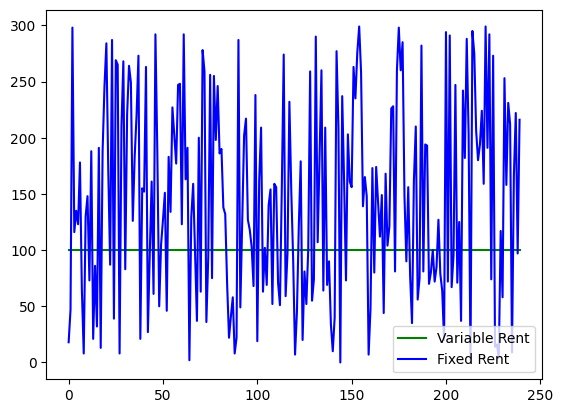

In [ ]:
living = 100
months = 240
fixed_waged = 200
lim_var_inf = 0 
lim_var_sup = 400

f, v = setting_params(living, months, fixed_waged, lim_var_inf, lim_var_sup)
plotting_var_fixed_rent (f, v)


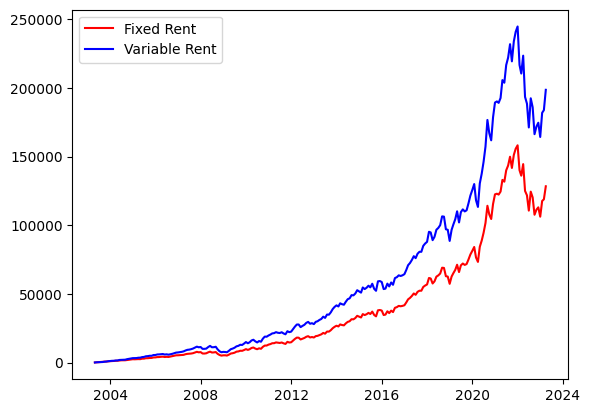

128427.76039302211
198697.15577702865


In [ ]:
file = "MacroTrends_Data_Download_QQQ.csv"
df = setting_investment(file, months)
tf, tv = getting_return(f, v, df)

print(tf[-1])
print(tv[-1])